In [2]:
import pandas as pd

cols = ['description', 'country', 'variety', 'location', 'year', 'points']
df = pd.concat([pd.read_parquet('data/wine/wine_review.parquet.gzip', columns=cols), pd.read_parquet('data/wine/wine_review-tfidf.parquet.gzip').drop(['price', 'variety', 'winery','year','quality'], axis=1)], axis=1)
print(df.shape)
df.head()

(100538, 943)


,description,country,variety,location,year,points,accent,accessible,accompany,acid,...,worth,wrap,yeast,yeasty,yellow,yield,young,youthful,zest,zesty
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend,Etna,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red,Douro,2011,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris,Oregon,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling,Michigan,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Much like the regular bottling from 2012, this...",US,Pinot Noir,Oregon,2012,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
desc = df[df.duplicated('description', keep=False)].iloc[0].description
desc

'This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.'

In [4]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100538 entries, 0 to 129970
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  100538 non-null  object
 1   country      100538 non-null  object
 2   variety      100538 non-null  object
 3   location     100538 non-null  object
 4   year         100538 non-null  int64 
 5   points       100538 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 5.4+ MB


In [5]:
df.query(f'description == "{desc}"')

,description,country,variety,location,year,points,accent,accessible,accompany,acid,...,worth,wrap,yeast,yeasty,yellow,yield,young,youthful,zest,zesty
4230,This zesty red has pretty aromas that suggest ...,Italy,Sangiovese,Tuscany,2014,88,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408577
19269,This zesty red has pretty aromas that suggest ...,Italy,Sangiovese,Tuscany,2014,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408577


In [8]:
dp = df.drop_duplicates(['description'], keep=False)
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100496 entries, 0 to 129970
Columns: 943 entries, description to zesty
dtypes: float64(937), int64(2), object(4)
memory usage: 723.8+ MB


,description,country,variety,location,year,points,accent,accessible,accompany,acid,...,worth,wrap,yeast,yeasty,yellow,yield,young,youthful,zest,zesty
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend,Etna,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red,Douro,2011,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris,Oregon,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling,Michigan,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Much like the regular bottling from 2012, this...",US,Pinot Noir,Oregon,2012,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points < 83:
        return 'acceptable'
    elif points >= 83 and points < 87:
        return 'good' 
    elif points >= 87 and points < 90:
        return 'very good' 
    elif points >= 90 and points < 94:
        return 'excellent'
    elif points >= 94 and points < 98:
        return 'superb'
    else:
        return 'classic'

#Applying transform method and assigning result to new column "points_simplified"
dp = dp.assign(points_simplified = dp['points'].apply(transform_points_simplified))
dp.head()

,description,country,variety,location,year,points,accent,accessible,accompany,acid,...,wrap,yeast,yeasty,yellow,yield,young,youthful,zest,zesty,points_simplified
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend,Etna,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very good
1,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red,Douro,2011,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very good
2,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris,Oregon,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very good
3,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling,Michigan,2013,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very good
4,"Much like the regular bottling from 2012, this...",US,Pinot Noir,Oregon,2012,87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very good


<Axes: title={'center': 'Number of wines per points'}, xlabel='points_simplified', ylabel='Number of wines'>

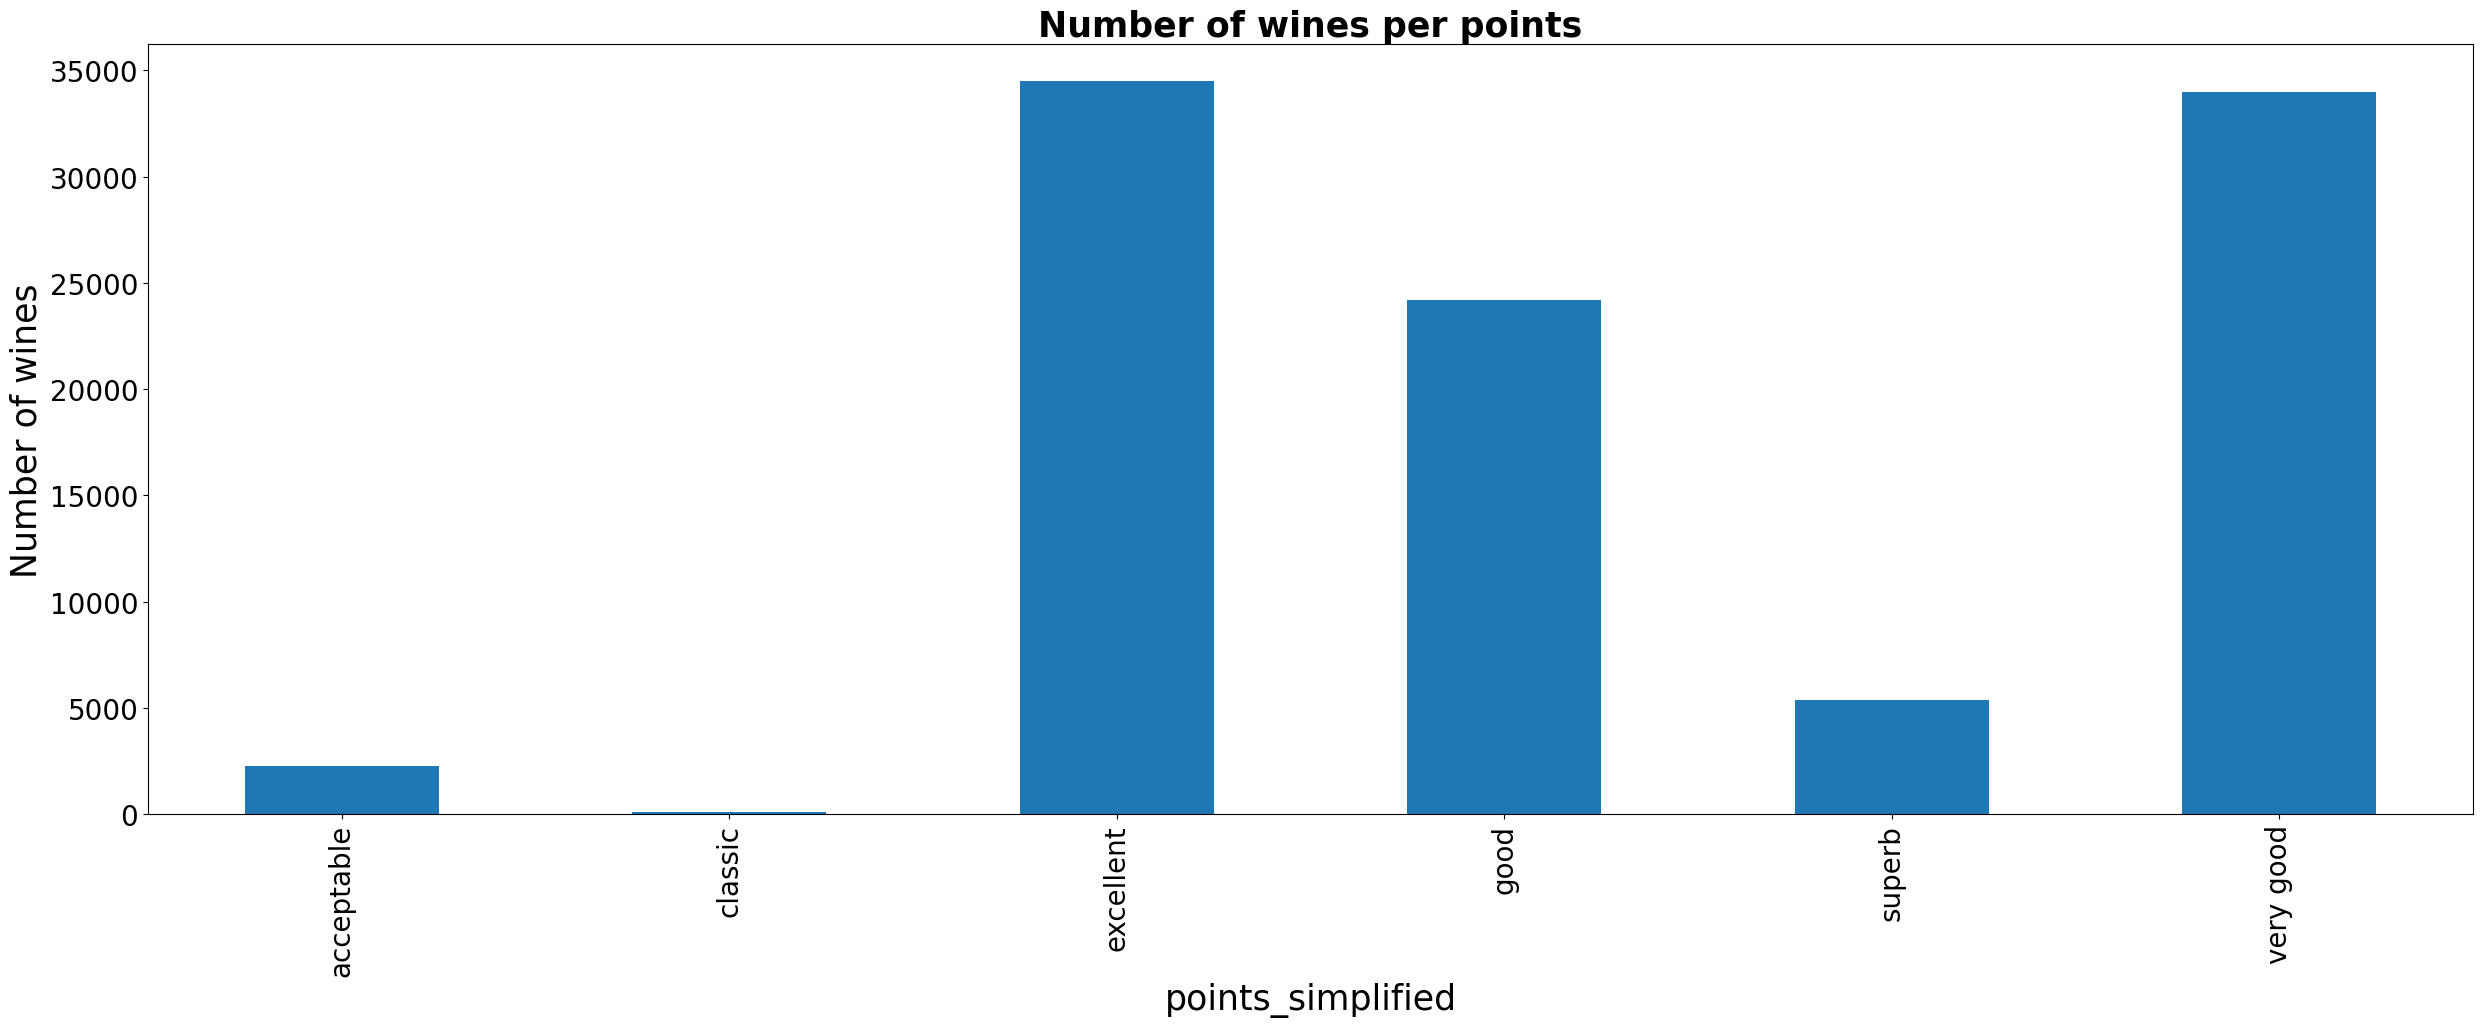

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
dp.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

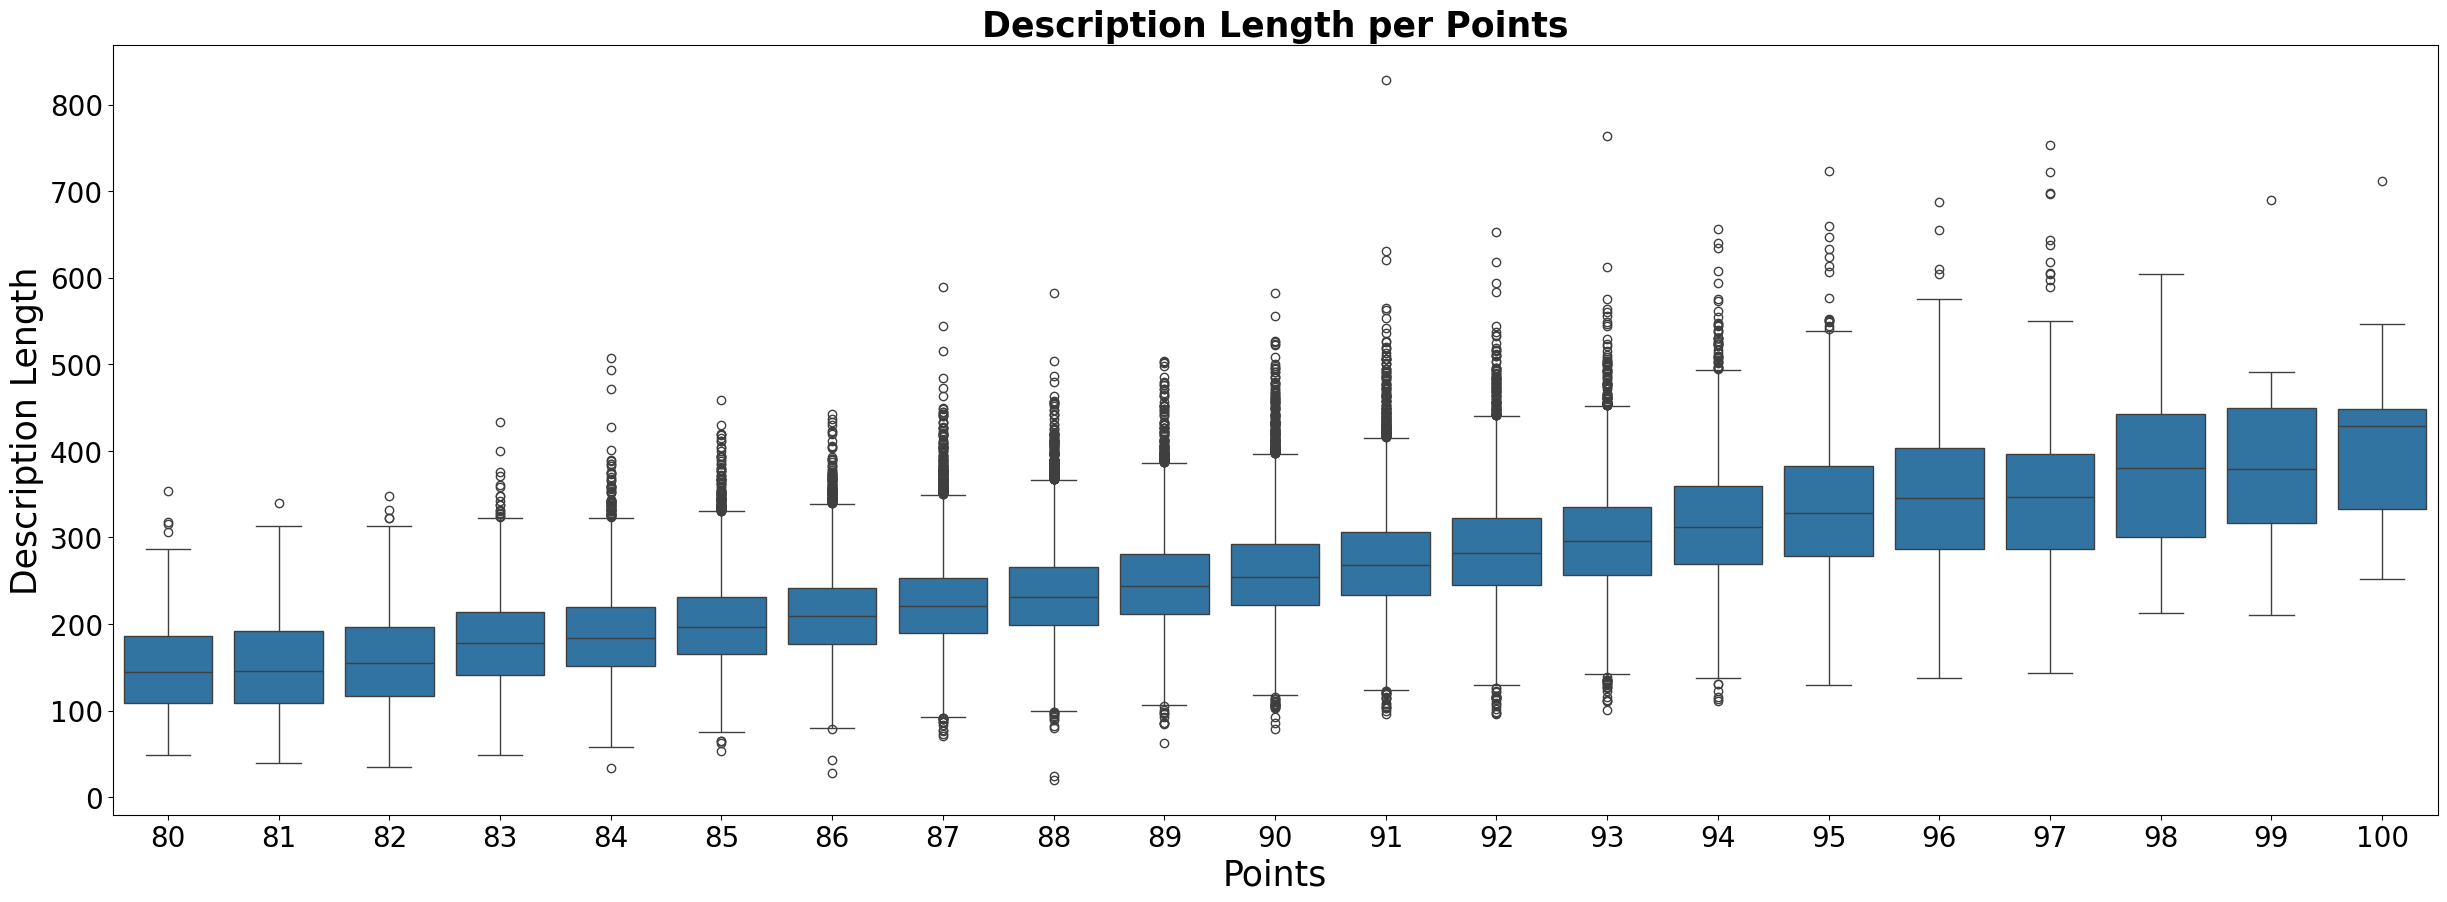

In [18]:
import seaborn as sns

dp['description_length'] = dp.description.str.len()

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=dp)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

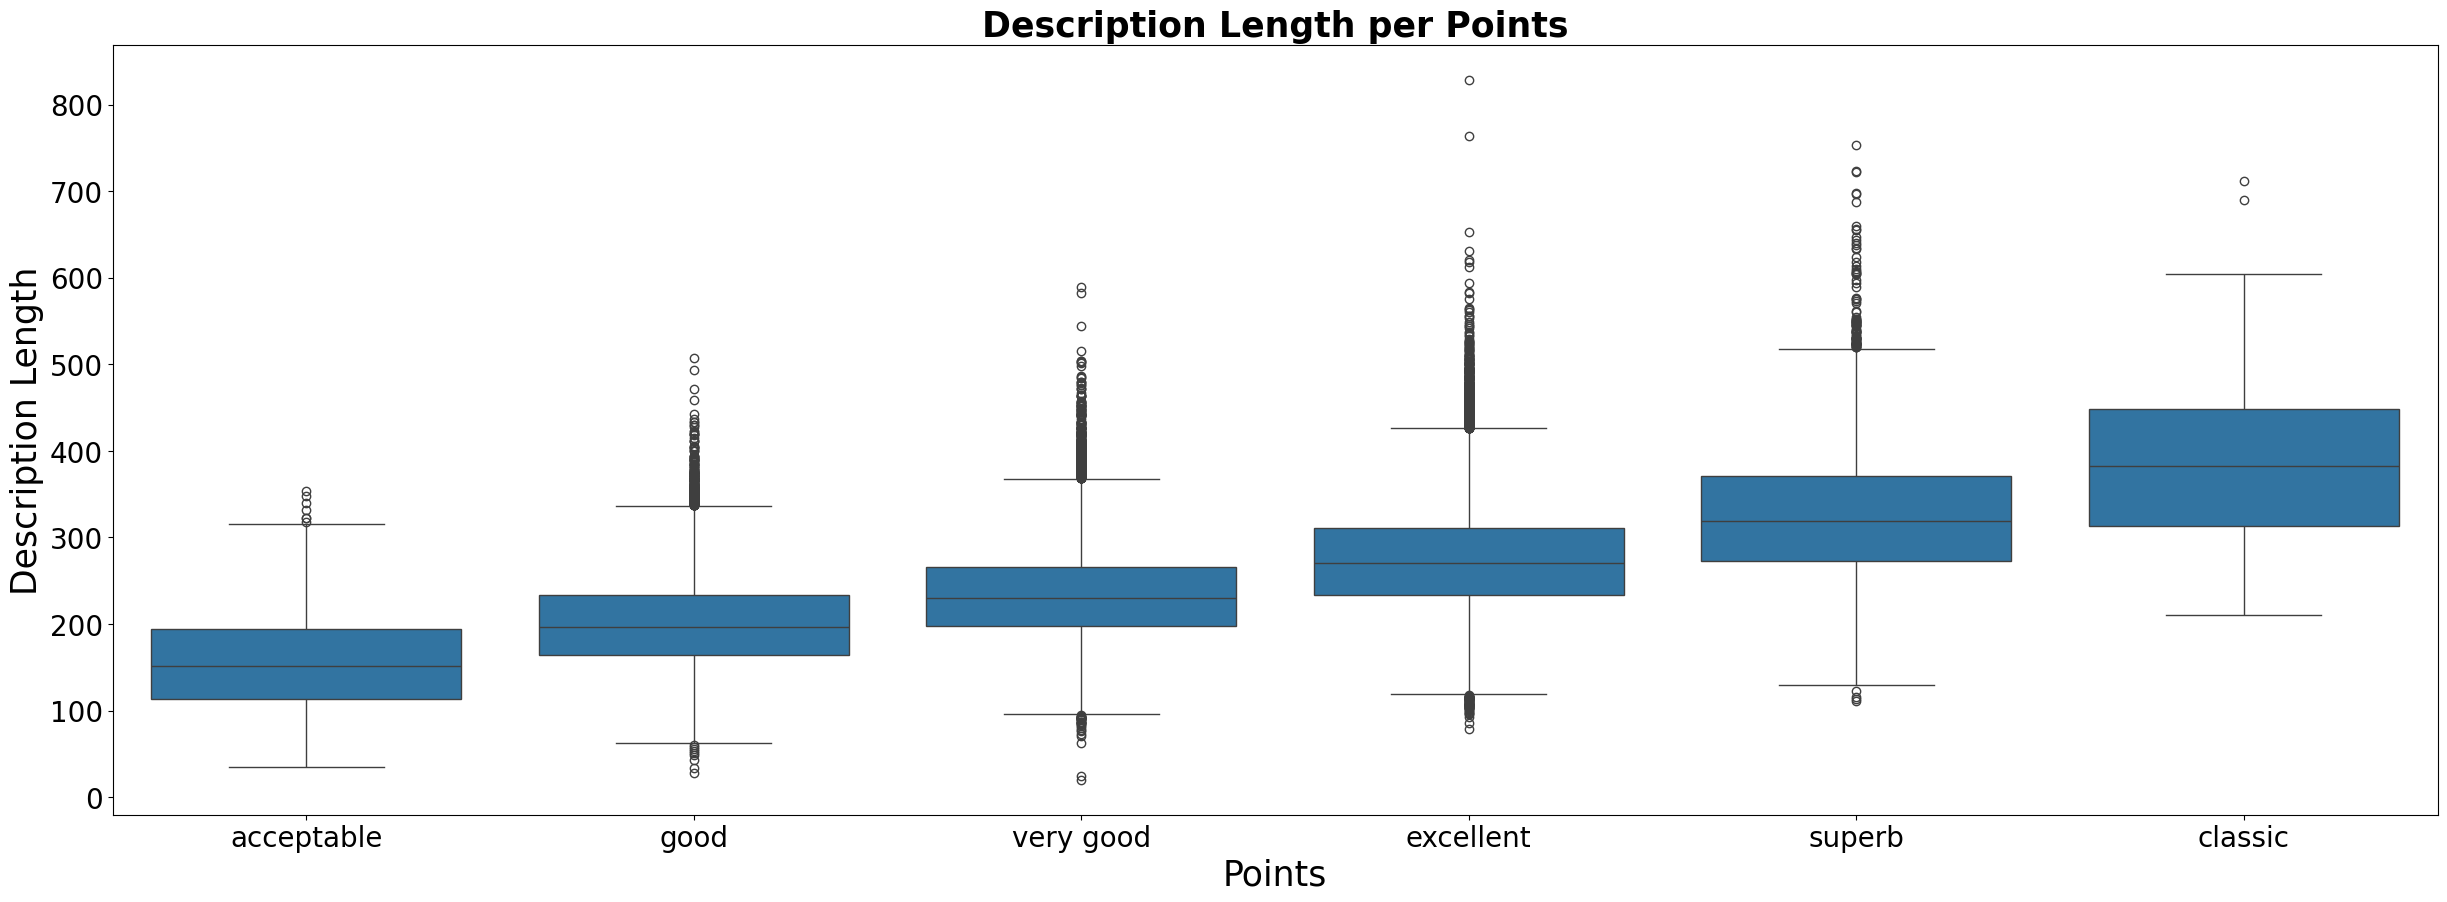

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points_simplified', y='description_length', data=dp, order=['acceptable', 'good', 'very good', 'excellent', 'superb', 'classic'])
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
X = dp['description']
y = dp['points_simplified']

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [22]:
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (100496, 28677)
Amount of Non-Zero occurrences:  3470903
Density: 0.12043701535880169


In [23]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       0.88      0.07      0.12       213
     classic       0.00      0.00      0.00         7
   excellent       0.63      0.75      0.68      3518
        good       0.63      0.64      0.64      2404
      superb       1.00      0.00      0.00       526
   very good       0.55      0.55      0.55      3382

    accuracy                           0.60     10050
   macro avg       0.61      0.33      0.33     10050
weighted avg       0.63      0.60      0.58     10050



/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [24]:
X = dp['description']
y = dp['points_simplified']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [25]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       0.92      0.06      0.11       213
     classic       0.00      0.00      0.00         7
   excellent       0.60      0.78      0.68      3518
        good       0.65      0.59      0.62      2404
      superb       1.00      0.00      0.01       526
   very good       0.54      0.53      0.53      3382

    accuracy                           0.59     10050
   macro avg       0.62      0.33      0.32     10050
weighted avg       0.62      0.59      0.57     10050



/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [26]:
X = dp['description']
y = dp['points_simplified']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [27]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       0.92      0.05      0.10       213
     classic       0.00      0.00      0.00         7
   excellent       0.60      0.77      0.68      3518
        good       0.64      0.57      0.61      2404
      superb       0.00      0.00      0.00       526
   very good       0.53      0.53      0.53      3382

    accuracy                           0.59     10050
   macro avg       0.45      0.32      0.32     10050
weighted avg       0.56      0.59      0.56     10050



/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

**Embeddings**

In [28]:
X = pd.read_parquet('data/wine/mpnet_embeddings.parquet.gzip').loc[dp.index]
y = dp['points_simplified']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       1.00      0.01      0.02       213
     classic       0.00      0.00      0.00         7
   excellent       0.55      0.71      0.62      3518
        good       0.58      0.46      0.52      2404
      superb       1.00      0.01      0.01       526
   very good       0.46      0.50      0.48      3382

    accuracy                           0.53     10050
   macro avg       0.60      0.28      0.27     10050
weighted avg       0.56      0.53      0.50     10050



/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/ucb/wine_reviews/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [30]:
confusion_matrix(y_test, predictions)

array([[   2,    0,   16,  162,    0,   33],
       [   0,    0,    7,    0,    0,    0],
       [   0,    0, 2486,   97,    0,  935],
       [   0,    0,  369, 1114,    0,  921],
       [   0,    0,  465,    6,    3,   52],
       [   0,    0, 1175,  528,    0, 1679]])